In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ODI_matches.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Scorecard', 'Team 1', 'Team 2', 'Margin', 'Ground',
       'Match Date', 'Winner', 'Host_Country', 'Venue_Team1', 'Venue_Team2',
       'Innings_Team1', 'Innings_Team2'],
      dtype='object')

In [4]:
df.head()

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second


In [5]:
Teams = df["Winner"].unique()
print(Teams)
len(Teams)

['Australia' 'England' 'New Zealand' 'West Indies' 'Pakistan' 'India'
 'Sri Lanka' 'Zimbabwe' 'South Africa' 'Kenya' 'U.A.E.' 'Bangladesh'
 'Canada' 'Netherlands' 'Bermuda' 'Ireland' 'Scotland' 'Afghanistan'
 'P.N.G.' 'Hong Kong' 'Namibia' 'U.S.A.' 'East Africa']


23

In [6]:
df.drop(columns = "Unnamed: 0", inplace = True)
df.head(2)

,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First


## Renaming columns

In [7]:
# Scorecard --> match_id
# Ground    --> venue
# Margin    --> winners_inng 
df.rename(columns = {"Scorecard":"Match_id", "Ground":"Venue", "Margin":"Winners_inng"}, inplace = True)

In [8]:
df['Match_id'].nunique()

3747

### OBSERVATION:- Out of 7494 rows, there are only 3747 unique match id's, seems like there are duplicates

In [9]:
df = df.drop_duplicates(subset = ['Venue', 'Match Date',"Match_id"])

In [10]:
df.head()

,Match_id,Team 1,Team 2,Winners_inng,Venue,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second


In [11]:
df.shape

(3748, 12)

## Handling Match_id column

In [12]:
### ODI # 1
### ODI # 3934

def get_match_id(st):
    st = st.split("#")[1]
    return int(st[1:])

# df['Match_id'] = str(df['Match_id']).split('#')[1]
# print(get_match_id("ODI # 1234"))

# abcd = str(df['Match_id']).split('#')[1]
# abcd

In [13]:
df['Match_id'] = df['Match_id'].apply(get_match_id)

In [14]:
df.tail(2)

,Match_id,Team 1,Team 2,Winners_inng,Venue,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
3746,3935,East Africa,Namibia,Winner1stInning,Mumbai,"Aug 12, 2017",East Africa,India,Neutral,Neutral,First,Second
7482,3924,Sri Lanka,Pakistan,Winner1stInning,Abu Dhabi,"Oct 16, 2017",Pakistan,U.A.E.,Neutral,Neutral,Second,First


In [15]:
df['Match_id'].nunique()

3747

### Handling Winners_inng column

In [16]:
df['Winners_inng'].value_counts()

Winner2ndInning    1907
Winner1stInning    1841
Name: Winners_inng, dtype: int64

In [17]:
# Winner2ndInning
# Winner1stInning

def get_winners_inng(st):
    return st[6]
print(get_winners_inng('Winner1stInning'))

# or 

# df['Winners_inng'] = str(df['Winners_inng'])[6]


1


In [18]:
df['Winners_inng'] = df['Winners_inng'].apply(get_winners_inng)

In [19]:
df.head(2)

,Match_id,Team 1,Team 2,Winners_inng,Venue,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,1,Australia,England,2,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,2,England,Australia,2,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First


In [20]:
def get_year(st):
    st = st.split(",")[1]
    return int(st)

print(get_year("Jan 5, 1971"))

1971


In [21]:
df['Year'] = df['Match Date'].apply(get_year)

In [22]:
df.head(2)

,Match_id,Team 1,Team 2,Winners_inng,Venue,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2,Year
0,1,Australia,England,2,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First,1971
1,2,England,Australia,2,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First,1972


In [27]:
analysis_df = df
analysis_df.head()

,Match_id,Team 1,Team 2,Winners_inng,Venue,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2,Year
0,1,Australia,England,2,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First,1971
1,2,England,Australia,2,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First,1972
2,3,England,Australia,2,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second,1972
3,4,England,Australia,2,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First,1972
4,5,New Zealand,Pakistan,1,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second,1973


In [28]:
df.to_csv(r'C:\Users\Murari\PycharmProjects\Cricket_Analysis\analysis_df.csv', index=False)

### Overall analysis

In [29]:
df['Year'].value_counts().sum()
## Total # of matches played till Aug 2017 --> 3748

3748

C:\Users\Murari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


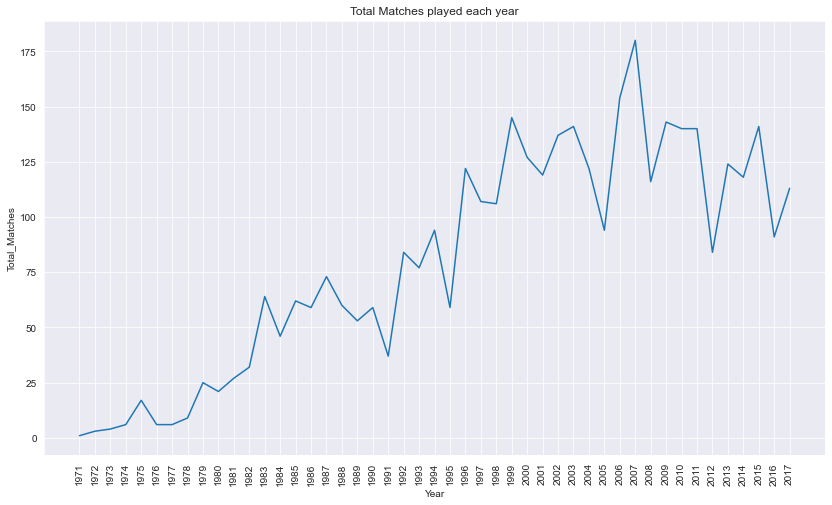

In [40]:
year = df['Year'].value_counts().sort_values(ascending=False).reset_index()
year.columns = ["Year", "Total_Matches"]


plt.figure(figsize = (14,8))
sns.set_style('darkgrid')
sns.lineplot(year.Year, year.Total_Matches)
plt.xticks(year.Year,rotation='vertical')
plt.title("Total Matches played each year")
plt.show()

### OBSERAVATION:- In 2007, around 180 matches played

In [26]:
Host_countries = df['Host_Country'].value_counts().reset_index()

In [27]:
Host_countries.columns = ["Country", "Matches"]
Host_countries

,Country,Matches
0,Australia,585
1,India,396
2,England,387
3,South Africa,314
4,New Zealand,301
5,U.A.E.,296
6,West Indies,285
7,Sri Lanka,261
8,Zimbabwe,202
9,Bangladesh,199


In [28]:
total_hosted_matches = Host_countries.Matches.sum()
total_hosted_matches

3683

In [29]:
Host_countries['perc'] = 0
def get_host_perc(Matches):
    val = round( ((Matches*100)/3683))
    return val
Host_countries['perc'] = Host_countries["Matches"].apply(get_host_perc)
Host_countries

,Country,Matches,perc
0,Australia,585,16
1,India,396,11
2,England,387,11
3,South Africa,314,9
4,New Zealand,301,8
5,U.A.E.,296,8
6,West Indies,285,8
7,Sri Lanka,261,7
8,Zimbabwe,202,5
9,Bangladesh,199,5


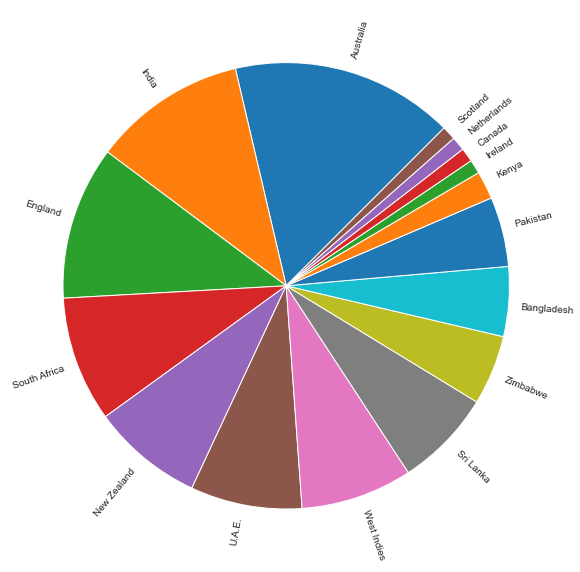

In [30]:
# Host_countries.iloc[:-1,:]['perc']
# # Host_countries.Country.iloc[:-1,:]
plt.figure(figsize=(10,15))
sns.set_style('darkgrid')
plt.pie(Host_countries.iloc[:-3,:]['perc'],  labels = Host_countries.iloc[:-3,:]['Country'], startangle=45, labeldistance=1.05, rotatelabels =True )
plt.show()

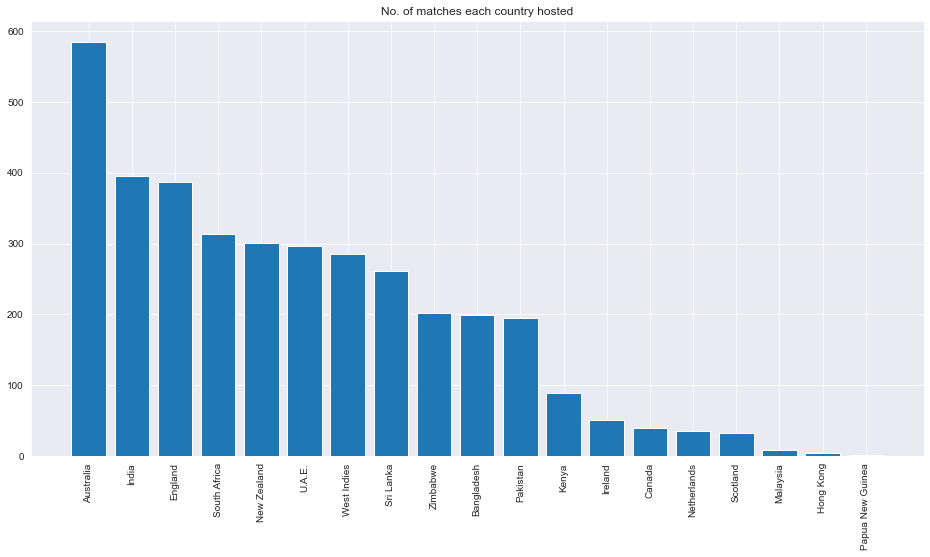

In [31]:
plt.figure(figsize = (16,8))
sns.set_style('darkgrid')
plt.bar(Host_countries.Country, Host_countries.Matches)
plt.title("No. of matches each country hosted")
plt.xticks(rotation = "vertical")
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax = plt.bar(host_countries.Country, host_countries.Matches)
ax.

### OBSERVATION:- Australia hosted most number of matches followed by India and england

In [32]:
# No of wins by each team

In [33]:
wins_by_teams = df['Winner'].value_counts().reset_index()
wins_by_teams.columns = ["countries", "wins"]
wins_by_teams

,countries,wins
0,Australia,552
1,India,475
2,Pakistan,467
3,West Indies,380
4,Sri Lanka,371
5,South Africa,361
6,England,343
7,New Zealand,324
8,Zimbabwe,129
9,Bangladesh,105


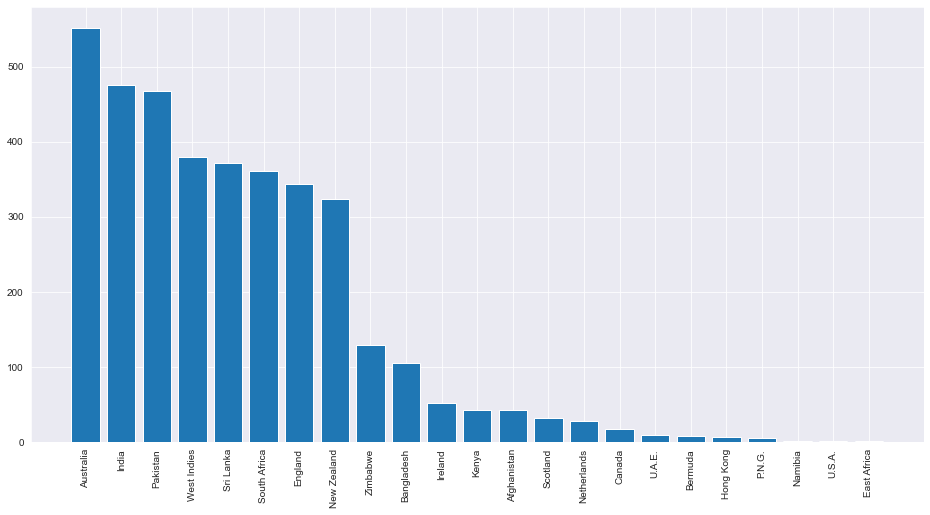

In [34]:
plt.figure(figsize = (16,8))
sns.set_style('darkgrid')
plt.bar(wins_by_teams.countries, wins_by_teams.wins)
plt.xticks(rotation = "vertical")
plt.show()

In [35]:
def get_total_matches(team):
    total_matches = df[ (df['Team 1'] == team) | (df['Team 2'] == team) ]
    total_wins = df[df["Winner"]==team]
    tot_wins, c = total_wins.shape
    matches_played, cols = total_matches.shape
#     d = {"Team":team, "Total_Matches":matches_played,"Total_Wins":tot_wins}
    d = [team,  matches_played, tot_wins]
    return d

In [36]:
print(get_total_matches("Namibia"))

['Namibia', 8, 1]


In [37]:
Teams

array(['Australia', 'England', 'New Zealand', 'West Indies', 'Pakistan',
       'India', 'Sri Lanka', 'Zimbabwe', 'South Africa', 'Kenya',
       'U.A.E.', 'Bangladesh', 'Canada', 'Netherlands', 'Bermuda',
       'Ireland', 'Scotland', 'Afghanistan', 'P.N.G.', 'Hong Kong',
       'Namibia', 'U.S.A.', 'East Africa'], dtype=object)

In [38]:
matches_won_of_total = pd.DataFrame(columns = ["Team","Total_Matches","Total_Wins"])
for team in Teams:
    d = get_total_matches(team)
#     print(d)
    matches_won_of_total.loc[len(matches_won_of_total)] = d
matches_won_of_total 

,Team,Total_Matches,Total_Wins
0,Australia,859,552
1,England,664,343
2,New Zealand,686,324
3,West Indies,731,380
4,Pakistan,855,467
5,India,880,475
6,Sri Lanka,767,371
7,Zimbabwe,474,129
8,South Africa,561,361
9,Kenya,149,42


In [39]:
mwt = matches_won_of_total
mwt.head()

,Team,Total_Matches,Total_Wins
0,Australia,859,552
1,England,664,343
2,New Zealand,686,324
3,West Indies,731,380
4,Pakistan,855,467


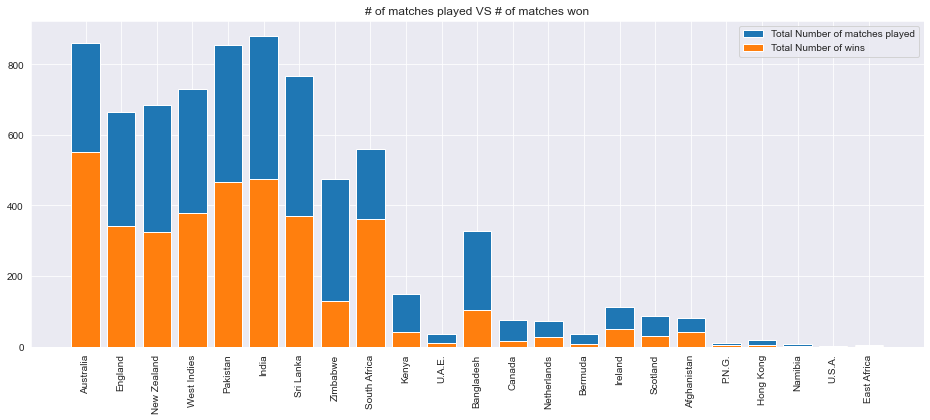

In [40]:
plt.figure(figsize = (16,6))
sns.set_style('darkgrid')
plt.bar(mwt['Team'], mwt['Total_Matches'], label = "Total Number of matches played")
plt.bar(mwt['Team'], mwt['Total_Wins'], label = "Total Number of wins")
plt.xticks(rotation = "vertical")
plt.title("# of matches played VS # of matches won")
plt.legend()
plt.show()

In [41]:
type(matches_won_of_total.Total_Matches)

pandas.core.series.Series

In [42]:
df.head(2)

,Unnamed: 0,Match_id,Team 1,Team 2,Winners_inng,Venue,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2,Year
0,0,1,Australia,England,2,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First,1971
1,1,2,England,Australia,2,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First,1972


## At Home Wins vs Loss

In [43]:
# At Home grounds
# total_played

def total_matches_at_Home(team):
    home =  df [ (   (df['Team 1'] == team) | (df['Team 2'] == team) ) &  (df['Host_Country'] == team)  ]
    home_won = df[ ( (df["Team 1"] == team) | (df['Team 2'] == team) ) &  (df['Host_Country'] == team) &  (df['Winner']==team) ]
    wrows,wcols = home_won.shape  
    rows, cols = home.shape
    return [team,rows,wrows]

print(total_matches_at_Home("Australia"))

['Australia', 409, 274]


In [44]:
Home = pd.DataFrame(columns = ["Country", "Total_Matches", "Total_Matches_won"])
for team in Teams:
    li = total_matches_at_Home(team)
    Home.loc[len(Home)] = li
Home

,Country,Total_Matches,Total_Matches_won
0,Australia,409,274
1,England,270,160
2,New Zealand,271,162
3,West Indies,230,129
4,Pakistan,165,101
5,India,295,179
6,Sri Lanka,211,137
7,Zimbabwe,189,58
8,South Africa,229,168
9,Kenya,55,23


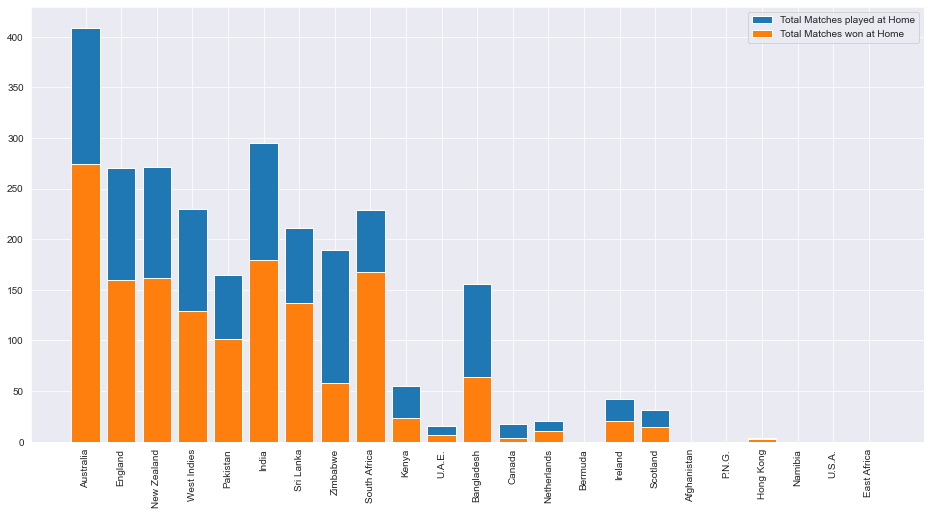

In [45]:
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
plt.bar(Home.Country, Home.Total_Matches, label = "Total Matches played at Home")
plt.bar(Home.Country, Home.Total_Matches_won, label = "Total Matches won at Home")
plt.xticks(rotation = "vertical")
plt.legend()
plt.show()

In [46]:
def total_matches_at_away_Home(team):
    home =  df [ (   (df['Team 1'] == team) | (df['Team 2'] == team) ) &  (df['Host_Country'] != team)  ]
    home_won = df[ ( (df["Team 1"] == team) | (df['Team 2'] == team) ) &  (df['Host_Country'] != team) &  (df['Winner']==team) ]
    arows,wcols = home_won.shape  
    rows, cols = home.shape
    return [team,rows,arows]

print(total_matches_at_away_Home("Australia"))

['Australia', 450, 278]


In [47]:
Away_Home = pd.DataFrame(columns = ["Country", "Total_Matches", "Total_Matches_won"])
for team in Teams:
    li = total_matches_at_away_Home(team)
#     print(li)
    Away_Home.loc[len(Away_Home)] = li
Away_Home

,Country,Total_Matches,Total_Matches_won
0,Australia,450,278
1,England,394,183
2,New Zealand,415,162
3,West Indies,501,251
4,Pakistan,690,366
5,India,585,296
6,Sri Lanka,556,234
7,Zimbabwe,285,71
8,South Africa,332,193
9,Kenya,94,19


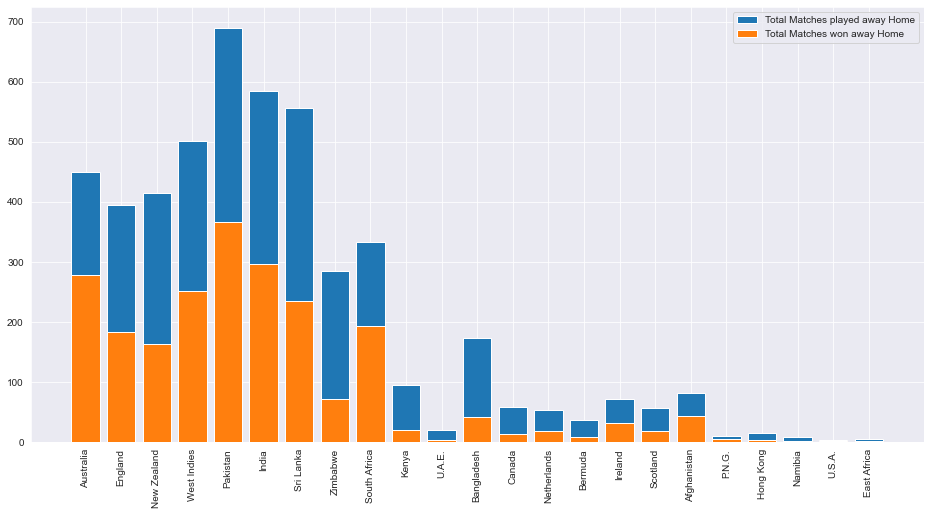

In [48]:
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
plt.bar(Away_Home.Country, Away_Home.Total_Matches, label = "Total Matches played away Home")
plt.bar(Away_Home.Country, Away_Home.Total_Matches_won, label = "Total Matches won away Home")
plt.xticks(rotation = "vertical")
plt.legend()
plt.show()

In [49]:
def ywin(country):
    data = df.loc[df.Winner == country].groupby('Year').apply(lambda p : p.Winner.value_counts())
    return data
for team in Teams:
    ydata = ywin(team)
    if team == 'Australia':
        yearwisewin = ydata
        yearwisewin
    elif team != 'Australia':
        yearwisewin = yearwisewin.join(ydata)
        yearwisewin
        


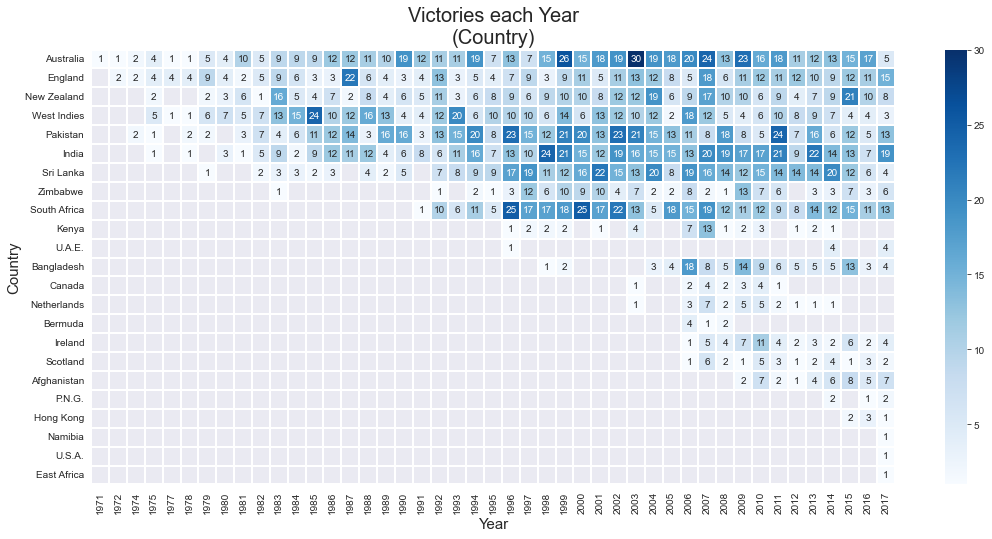

In [50]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,8))
sns.heatmap(data=yearwisewin.transpose(), annot=True, cmap='Blues', linewidth=.05)
plt.xlabel('Year', size=15)
plt.ylabel('Country', size=15)
plt.title('Victories each Year\n(Country)', size=20)
plt.show()

### Venue based decision

In [51]:
Venues = df.Venue.value_counts().reset_index()
Venues.columns = ['venue','no. of matches']
Venues['1st_inng_wins'] = 0
Venues['2nd_inng_wins'] = 0
Venues
# There are 162 different venues

,venue,no. of matches,1st_inng_wins,2nd_inng_wins
0,Sharjah,226,0,0
1,Colombo,179,0,0
2,Dhaka,154,0,0
3,Melbourne,150,0,0
4,Sydney,147,0,0
...,...,...,...,...
157,Sahiwal,1,0,0
158,Launceston,1,0,0
159,Vijayawada,1,0,0
160,Kwekwe,1,0,0


In [45]:
def get_venue_details(venue):
    first_wins  = df[ (df["Venue"] == venue)  & (df['Winners_inng'] == "2")]
    second_wins = df[ (df["Venue"] == venue)  & (df['Winners_inng'] == "1")]
    frows , c = first_wins.shape
    srows, co = second_wins.shape
    return [venue,frows, srows,frows+srows]
get_venue_details("Sharjah")

['Sharjah', 104, 122, 226]

In [46]:
Venues = df['Venue'].unique()
Venues

array(['Melbourne', 'Manchester', "Lord's", 'Birmingham', 'Christchurch',
       'Swansea', 'Leeds', 'The Oval', 'Dunedin', 'Nottingham',
       'Adelaide', 'Auckland', 'Scarborough', 'Sialkot', 'Albion',
       'Sahiwal', 'Lahore', "St John's", 'Castries', 'Quetta', 'Sydney',
       'Brisbane', 'Karachi', 'Perth', 'Kingstown', 'Hamilton',
       'Ahmedabad', 'Jalandhar', 'Cuttack', 'Colombo', 'Wellington',
       'Amritsar', 'Delhi', 'Hyderabad', 'Bengaluru', 'Gujranwala',
       'Multan', 'Port of Spain', 'Napier', "St George's", 'Taunton',
       'Leicester', 'Bristol', 'Worcester', 'Southampton', 'Derby',
       'Tunbridge Wells', 'Chelmsford', 'Jaipur', 'Srinagar', 'Vadodara',
       'Indore', 'Jamshedpur', 'Guwahati', 'Moratuwa', 'Sharjah',
       'Kingston', 'New Delhi', 'Peshawar', 'Faisalabad', 'Pune',
       'Hobart', 'Nagpur', 'Chandigarh', 'Bridgetown', 'Rawalpindi',
       'Launceston', 'Kandy', 'Rajkot', 'Kanpur', 'Mumbai', 'Devonport',
       'Kolkata', 'Chennai', 'Farid

In [47]:
Venue_details = pd.DataFrame(columns = ["venue","1st_inng_wins","2nd_inng_wins","Total_matches"])
for venue in Venues:
    li = get_venue_details(venue)
    Venue_details.loc[len(Venue_details)] = li
    

In [48]:
Venue_details.head()

,venue,1st_inng_wins,2nd_inng_wins,Total_matches
0,Melbourne,74,76,150
1,Manchester,26,18,44
2,Lord's,32,25,57
3,Birmingham,25,26,51
4,Christchurch,28,30,58


Total no. of matches played in Birmingham is 51


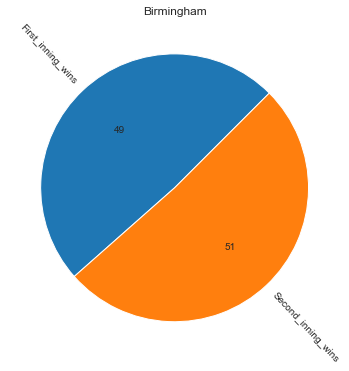

Choose To Bowl First


In [55]:
def plot_bar(venue):
    v = Venue_details[Venue_details["venue"] == venue]
    name = v['venue'].values[0]
    f = v['1st_inng_wins'].values[0]
    s = v['2nd_inng_wins'].values[0]
    print(f"Total no. of matches played in {venue} is {f+s}")
    
    plt.figure(figsize=(6,8))
    sns.set_style('darkgrid')
    p = [f,s]
    plt.pie([f,s],  labels = ["First_inning_wins", "Second_inning_wins"], startangle=45, labeldistance=1.05, rotatelabels =True, autopct=lambda p: '{:.0f}'.format(p))

#     plt.bar(['1st_inng_wins'], f, width = 0.4)
#     plt.bar(['2nd_inng_wins'], s, width = 0.4)
    
    plt.title(venue)
    plt.show()
    
    if f > s:
        print("Choose To Bat First")
    elif f == s:
        print("1st inng wins = 2nd inng wins")
    else:
        print("Choose To Bowl First")
    
plot_bar("Birmingham")

In [205]:
v = Venue_details[Venue_details["venue"] == venue]

name = v['venue'].values[0]
f = v['1st_inng_wins'].values[0]
s = v['2nd_inng_wins'].values[0]

print(name, f, s)

Abu Dhabi  0 1


In [206]:
t1 ="India"
t2 ="Pakistan"

vs = df[ ( (df["Team 1"] == t1) | (df["Team 2"] == t1) )    &  ( (df["Team 1"] == t2)  | (df["Team 2"] == t2) ) ]
tota ,sd = vs.shape
# TEAM 1
t1_wins = vs[ vs["Winner"] == t1]      # t1 wins df
t1w, x = t1_wins.shape                 # No. of wins by t1
t1_home = t1_wins[ t1_wins["Host_Country"] == t1 ]
t1_away = t1_wins[ t1_wins["Host_Country"] != t1 ]

t1_home_wins, c = t1_home.shape
t1_away_wins, cl = t1_away.shape


# TEAM 2
t2_wins = vs[ vs["Winner"] == t2]   # t2 wins df
t2w,y = t2_wins.shape                 # No. of wins by t2
t2_home = t2_wins[ t2_wins["Host_Country"] == t2 ]
t2_away = t2_wins[ t2_wins["Host_Country"] != t2 ]
t2_home_wins, cs = t2_home.shape
t2_away_wins, cc = t2_away.shape

draws = vs[  (vs["Winner"] != t1)  & (vs["Winner"] != t2 ) ]
ds = draws.shape

In [59]:
print(f"Total matches played between {t1} and {t2} is {tota}")

print("Total t1 wins",t1w)
print("Total t2 wins",t2w)

print("T1 Home wins",t1_home_wins,"\nT1 away wins",t1_away_wins)
print("T2 Home wins",t2_home_wins,"\nT2 away wins",t2_away_wins)


Total matches played between India and Pakistan is 123
Total t1 wins 51
Total t2 wins 72
T1 Home wins 9 
T1 away wins 42
T2 Home wins 12 
T2 away wins 60


Total no. of matches played between India and Pakistan is 123


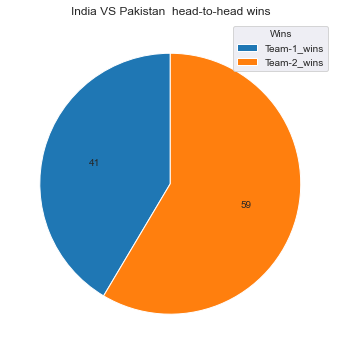

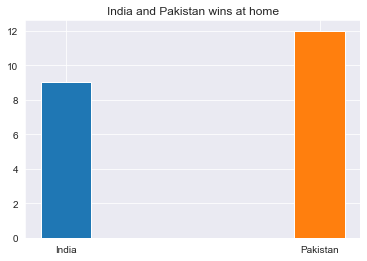

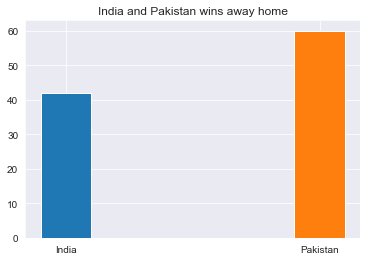

In [71]:
def plot_head_to_head(t1,t2,df):
    vs = df[ ( (df["Team 1"] == t1) | (df["Team 2"] == t1) )    &  ( (df["Team 1"] == t2)  | (df["Team 2"] == t2) ) ]
    tota ,sd = vs.shape
    # TEAM 1
    t1_wins = vs[ vs["Winner"] == t1]                           # t1 wins df
    t1w, x = t1_wins.shape                                      # No. of wins by t1
    t1_home = t1_wins[ t1_wins["Host_Country"] == t1 ]    
    t1_away = t1_wins[ t1_wins["Host_Country"] != t1 ]

    t1_home_wins, c = t1_home.shape                             # t1 total no. of wins vs t2 at home
    t1_away_wins, cl = t1_away.shape                            # t1 total no. of wins vs t2 at away home


    # TEAM 2
    t2_wins = vs[ vs["Winner"] == t2]   # t2 wins df
    t2w,y = t2_wins.shape                 # No. of wins by t2
    t2_home = t2_wins[ t2_wins["Host_Country"] == t2 ]
    t2_away = t2_wins[ t2_wins["Host_Country"] != t2 ]
    t2_home_wins, cs = t2_home.shape                            # t2 total no. of wins vs t1 at home
    t2_away_wins, cc = t2_away.shape                            # t2 total no. of wins vs t1 at away home

    draws = vs[  (vs["Winner"] != t1)  & (vs["Winner"] != t2 ) ]
    ds = draws.shape                                            # Total no. of draws if any
    
    
#     PLOTS
    
    print(f"Total no. of matches played between {t1} and {t2} is {tota}")

    plt.figure(figsize=(16,6))
#     plt.bar(t1,t1w)
#     plt.bar(t2,t2w)
    p = [t1w,t2w]
    plt.pie([t1w,t2w],   startangle=90, labeldistance=1.05, rotatelabels =True, autopct=lambda p: '{:.0f}'.format(p))
    plt.legend(title="Wins", labels = ["Team-1_wins", "Team-2_wins"])
    
    plt.title(f"{t1} VS {t2}  head-to-head wins")
    plt.show()
    
    plt.figure(figsize=(6,4))
    plt.bar(t1, t1_home_wins, width=0.2)
    plt.bar(t2, t2_home_wins, width=0.2)
    plt.title(f"{t1} and {t2} wins at home")
    plt.show()
    
    plt.figure(figsize=(6,4))
    plt.bar(t1, t1_away_wins, width=0.2)
    plt.bar(t2, t2_away_wins, width=0.2)
    plt.title(f"{t1} and {t2} wins away home")
    plt.show()
    
plot_head_to_head("India","Pakistan",df)

Total no. of matches played in Birmingham is 51
(<Figure size 432x288 with 1 Axes>, 25, 26)


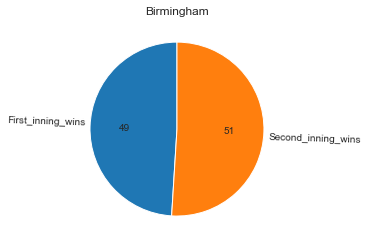

In [58]:
def plot_ground_bar(Venue_details, venue):
    v = Venue_details[Venue_details["venue"] == venue]
    name = v['venue'].values[0]
    f = v['1st_inng_wins'].values[0]
    s = v['2nd_inng_wins'].values[0]
    print(f"Total no. of matches played in {venue} is {f + s}")

    figg = plt.figure()
    # sns.set_style('darkgrid')
    p = [f,s]
    plt.pie([f,s],  labels = ["First_inning_wins", "Second_inning_wins"], startangle=90, labeldistance=1.05, rotatelabels =True, autopct=lambda p: '{:.0f}'.format(p))

#     plt.bar(['1st_inng_wins'], f, width=0.4)
#     plt.bar(['2nd_inng_wins'], s, width=0.4)
    plt.title(venue)


    return (figg, f, s)

print(plot_ground_bar(Venue_details,"Birmingham"))

In [77]:
analysis_df.head()

,Match_id,Team 1,Team 2,Winners_inng,Venue,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2,Year
0,1,Australia,England,2,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First,1971
1,2,England,Australia,2,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First,1972
2,3,England,Australia,2,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second,1972
3,4,England,Australia,2,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First,1972
4,5,New Zealand,Pakistan,1,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second,1973


Figure(1008x576)


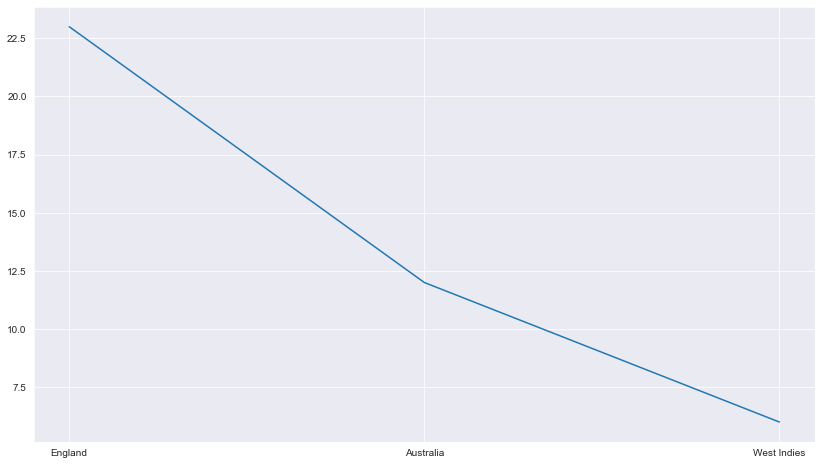

In [105]:
def most_team_wins(venue):
    venue_teams = analysis_df[ analysis_df["Venue"] == venue ]
    fig = plt.figure(figsize=(14,8))
    plt.plot(venue_teams.Winner.value_counts()[:3])
    return fig

print(most_team_wins("Lord's"))


(array([24.,  2.,  1.,  0.,  3.,  3.,  0.,  7.,  2.,  2.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

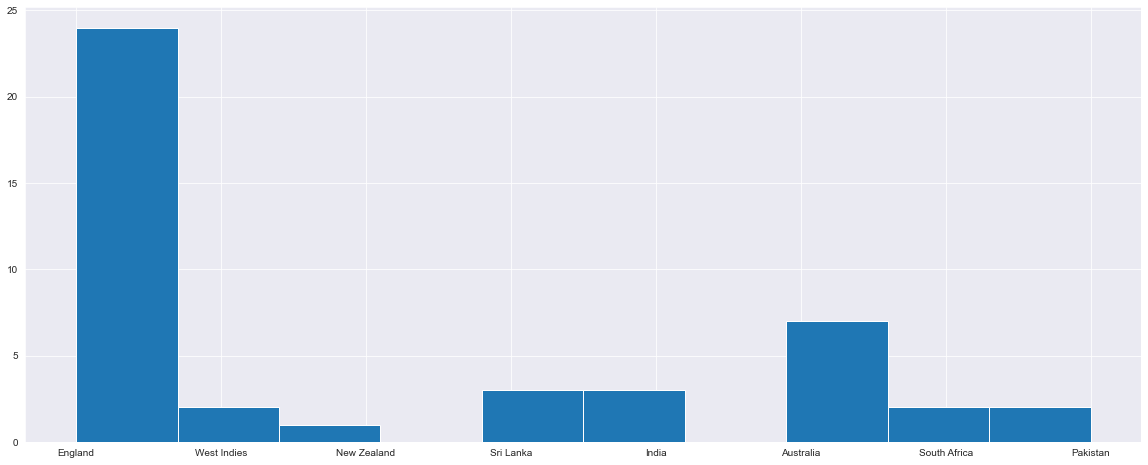

In [83]:
plt.figure(figsize=(20,8))
plt.hist(venue_teams.Winner)

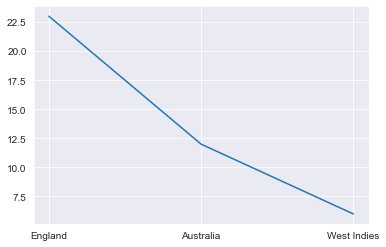

In [99]:
fig =  
plt.plot(venue_teams.Winner.value_counts()[:3])